# CLASSFICATION OF ENVIROMENTAL SOUNDS FROM THE 
# DATASET ESC-50
# Kushagra Kapoor

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob
from sklearn.metrics import classification_report
import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [5]:
audio_files = glob('C:\\Users\\KUSHAGRA\\Downloads\\ESC-50-master\\ESC-50-master\\audio\\*.wav')

# READ AND LISTEN TO DIFFERENT AUDIO INPUTS FROM THE DATASET

In [6]:
audio_files = glob('C:\\Users\\KUSHAGRA\\Downloads\\ESC-50-master\\ESC-50-master\\audio\\*.wav')

In [7]:
ipd.Audio(audio_files[0])

In [8]:
ipd.Audio(audio_files[2])

# PRE REQUISTE KNOWLEDGE FOR WORKING WITH AN AUDIO DATASET

Terms to know for Audio in Digital Form:¶
# Frequency (Hz)
Frequency describes the differences of wave lengths.


We interperate frequency has high and low pitches.


# Intensity (db / power)
Intensity describes the amplitude (height) of the wave.


# Sample Rate(sr)
Sample rate is specific to how the computer reads in the audio file.


Think of it as the "resolution" of the audio.


# VISUALIZATION OF DATASET (for a single sample)

In [9]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape y: (110250,)
sr: 22050


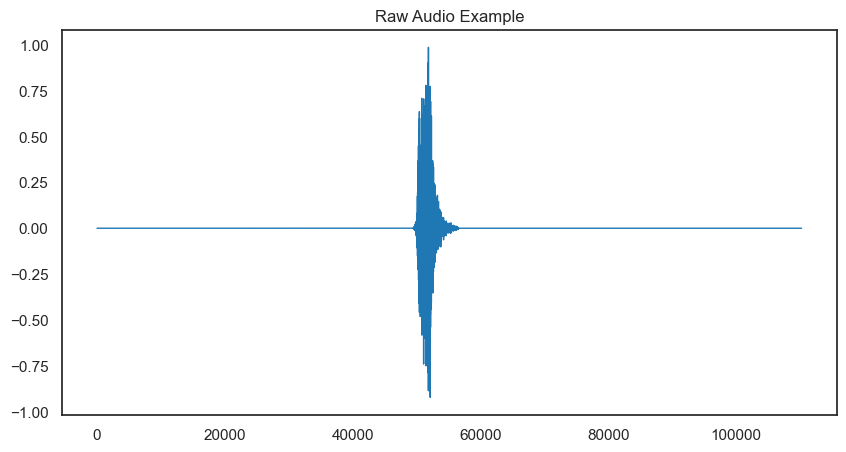

In [10]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

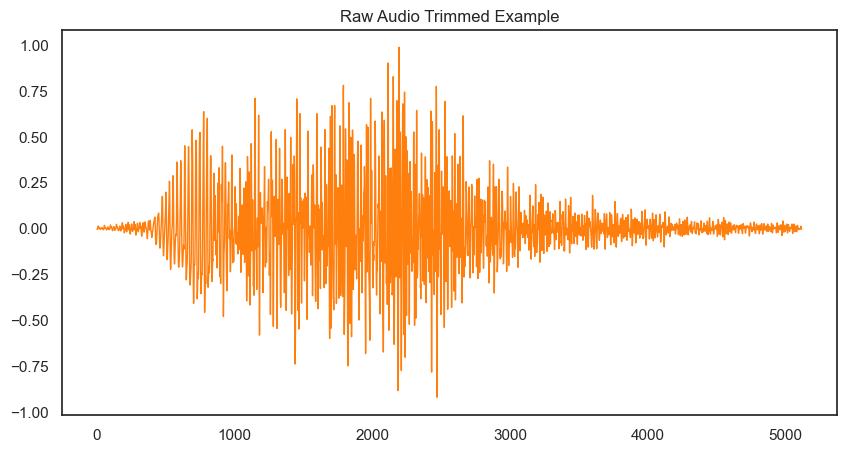

In [11]:
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                 color=color_pal[1])
plt.show()

#  Plot of a spectogram:

In [14]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 216)

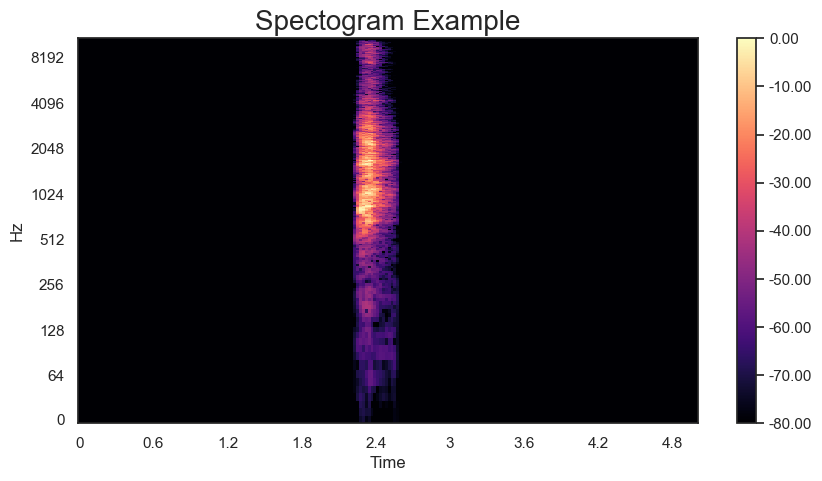

In [15]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

# PLOT OF MELODY_SPECTOGRAM FOR ALL  THE SAMPLES(5)

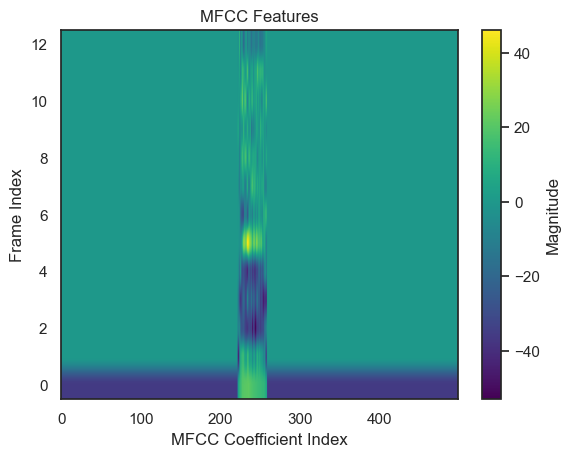

In [16]:
import numpy as np
import matplotlib.pyplot as plt  # For visualization
import scipy.io.wavfile as wav

# Function to extract MFCC features from audio file
def extract_mfcc(audio_file, num_cepstrum=13):
    rate, signal = wav.read(audio_file)
    mfcc_features = mfcc(signal, rate, numcep=num_cepstrum)
    return mfcc_features

# Example usage of the function to verify if it reads the audio file correctly

# Using Raw String Literal


# Or Escaping Backslashes
audio_file = "C:\\Users\\KUSHAGRA\\Downloads\\ESC-50-master\\ESC-50-master\\audio\\1-100032-A-0.wav"

# Replace this with the path to your audio file
mfcc_features = extract_mfcc(audio_file)

# Visualize the first few MFCC coefficients
plt.imshow(mfcc_features.T, cmap='viridis', origin='lower', aspect='auto')
plt.xlabel('MFCC Coefficient Index')
plt.ylabel('Frame Index')
plt.title('MFCC Features')
plt.colorbar(label='Magnitude')
plt.show()


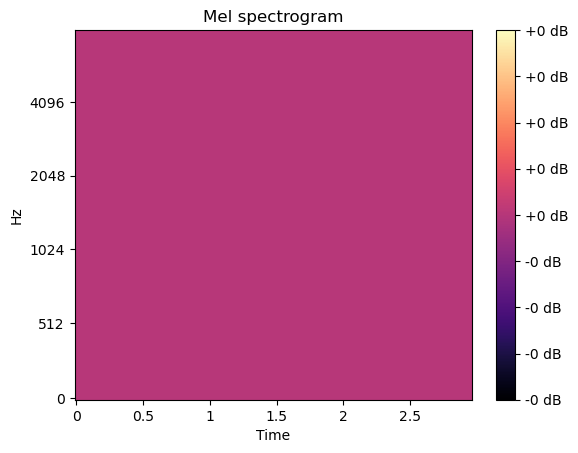

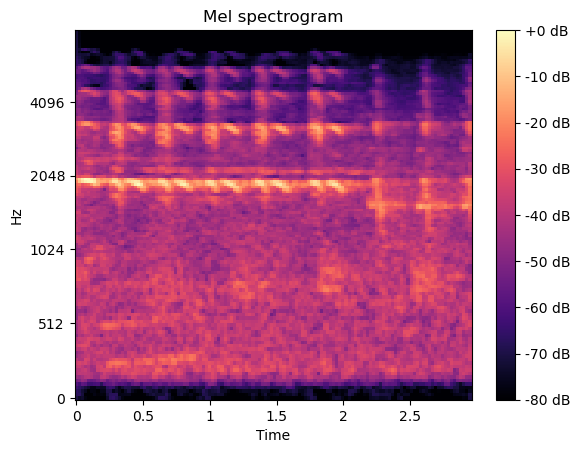

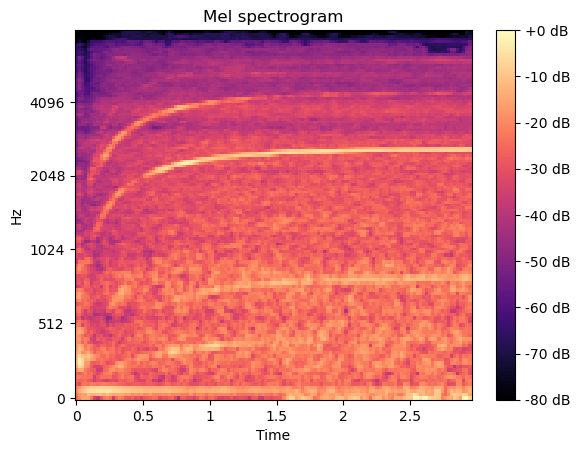

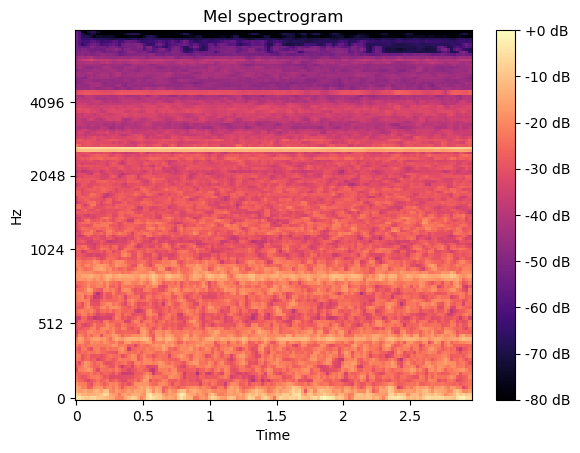

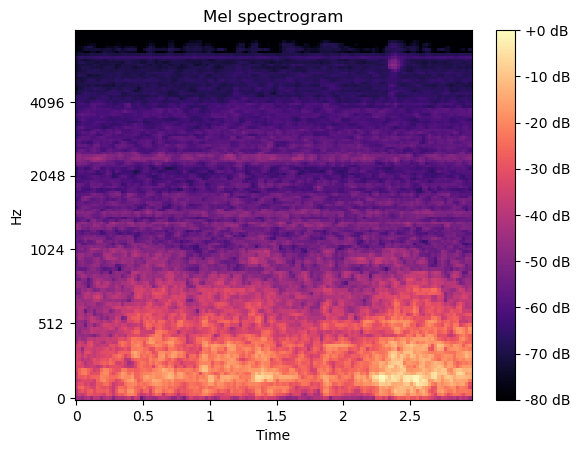

In [1]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Your file path
dataset_path = r"C:\Users\KUSHAGRA\Downloads\ESC-50-master\ESC-50-master\audio"

# Get list of filenames in the directory
filenames = os.listdir(dataset_path)

# Define empty lists to store features and labels
features = []
labels = []

# Counter for number of spectrograms generated
spectrogram_count = 0

for filename in filenames:
    if filename.endswith('.wav'):  # Check if file is a WAV file
        file_path = os.path.join(dataset_path, filename)
        audio_data, sr = librosa.load(file_path, sr=None)  # sr=None to preserve original sample rate
        
        # Example: Calculate mel spectrogram
        mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sr)
        
        # Resize spectrogram to a fixed length (optional)
        mel_spectrogram = librosa.util.fix_length(mel_spectrogram, size=128, axis=1)
        
        # Flatten spectrogram and append to features list
        features.append(mel_spectrogram.flatten())
        
        # Extract label from filename and append to labels list
        label = int(filename.split('-')[0])
        labels.append(label)
        
        # Example: Visualize mel spectrogram (optional)
        plt.figure()
        librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max),
                                 y_axis='mel', fmax=8000, x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel spectrogram')
        plt.show()
        
        # Increment the spectrogram count
        spectrogram_count += 1
        
        # Break the loop if 5 spectrograms have been generated
        if spectrogram_count == 5:
            break

# Convert lists to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Perform further processing or analysis (e.g., model training, evaluation, etc.)


# FEATURE EXTRACTION

In [266]:
from sklearn.preprocessing import StandardScaler
meta_table = pd.read_csv(r"C:\Users\KUSHAGRA\Downloads\ESC-50-master\ESC-50-master\meta\esc50.csv")
meta_table["category"] = meta_table.category.astype("category")
meta_table

x = []
for i in meta_table.filename:
    audioi, sri = librosa.load(rf"C:\Users\KUSHAGRA\Downloads\ESC-50-master\ESC-50-master\audio\{i}")
    x.append([np.mean(feature) for feature in librosa.feature.mfcc(y=audioi)])
x = np.array(x)
x
s = StandardScaler()
x1 = pd.DataFrame(x)
y = meta_table.category
X = pd.DataFrame(s.fit_transform(x1))  # Using transform instead of fit

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# WE NOW SEPERATE OUR LABELS FROM OTHER FEATURES INVOLVED AND THE USE SVM TO PERFORM CLASSIFICATION

In [267]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],                   # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],      # Kernel type
    'gamma': ['scale', 'auto', 0.1, 1],       # Kernel coefficient for 'rbf' and 'poly'
    'degree': [2, 3, 4]                       # Degree of the polynomial kernel function
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters found by grid search
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Initialize SVM classifier with the best parameters
svm_classifier = SVC(**best_params)

# Train SVM classifier with the best parameters
svm_classifier.fit(X_train, y_train)

# Predict labels for test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best parameters: {'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 0.4925


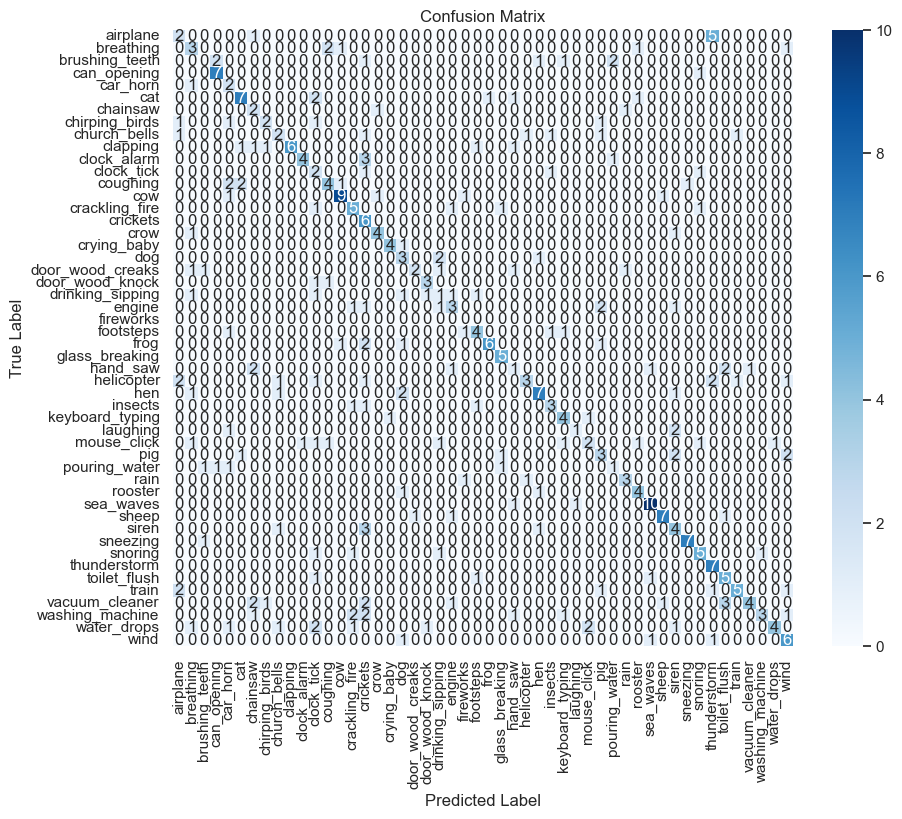

In [269]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Compute true positives, false positives, true negatives, false negatives


In [270]:
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

        airplane       0.25      0.25      0.25         8
       breathing       0.30      0.38      0.33         8
  brushing_teeth       0.00      0.00      0.00         7
     can_opening       0.70      0.88      0.78         8
        car_horn       0.20      0.67      0.31         3
             cat       0.64      0.58      0.61        12
        chainsaw       0.22      0.50      0.31         4
  chirping_birds       0.50      0.33      0.40         6
    church_bells       0.33      0.25      0.29         8
        clapping       1.00      0.55      0.71        11
     clock_alarm       0.80      0.50      0.62         8
      clock_tick       0.14      0.40      0.21         5
        coughing       0.50      0.40      0.44        10
             cow       0.75      0.69      0.72        13
  crackling_fire       0.45      0.56      0.50         9
        crickets       0.25      1.00      0.40         6
            c

C:\Users\KUSHAGRA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KUSHAGRA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KUSHAGRA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [271]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Calculate correct predictions for each category
correct_predictions = (y_pred == y_test)

# Create a DataFrame to store category-wise correct predictions count
category_counts = pd.DataFrame({'Category': y_test[correct_predictions].value_counts().index,
                                'Correct_Predictions': y_test[correct_predictions].value_counts().values})

# Sort DataFrame by correct predictions count in descending order
category_counts = category_counts.sort_values(by='Correct_Predictions', ascending=False)

# Take top 10 categories
top_10_categories = category_counts.head(10)

print(top_10_categories)


        Category  Correct_Predictions
0      sea_waves                   10
1            cow                    9
2   thunderstorm                    7
3    can_opening                    7
4       sneezing                    7
5            cat                    7
6          sheep                    7
7            hen                    7
11      clapping                    6
10          wind                    6


In [272]:
# Extract the top 10 categories
top_10_categories_list = top_10_categories['Category'].tolist()

# Filter the test set to include only samples belonging to the top 10 categories
X_test_top_10 = X_test[y_test.isin(top_10_categories_list)]
y_test_top_10 = y_test[y_test.isin(top_10_categories_list)]

# Predict labels for the filtered test set
y_pred_top_10 = svm_classifier.predict(X_test_top_10)

# Calculate accuracy for the top 10 categories
accuracy_top_10 = accuracy_score(y_test_top_10, y_pred_top_10)
print("Accuracy (Top 10 Categories):", accuracy_top_10)


Accuracy (Top 10 Categories): 0.7156862745098039


# USING DECISION TREE

In [219]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create Decision Tree classifier with default hyperparameters
dt_classifier = DecisionTreeClassifier(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2)

# Train Decision Tree classifier
dt_classifier.fit(X_train, y_train)

# Predict labels for test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.2075


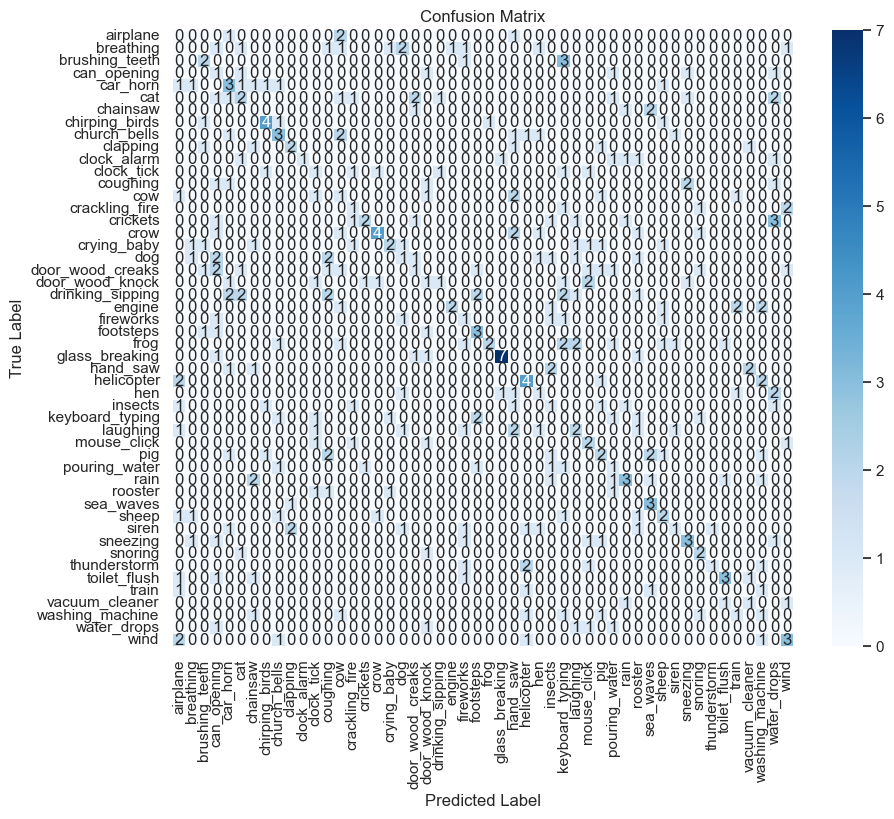

In [220]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Compute true positives, false positives, true negatives, false negatives


In [221]:
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

        airplane       0.00      0.00      0.00         4
       breathing       0.00      0.00      0.00        11
  brushing_teeth       0.29      0.33      0.31         6
     can_opening       0.06      0.17      0.09         6
        car_horn       0.23      0.30      0.26        10
             cat       0.20      0.15      0.17        13
        chainsaw       0.00      0.00      0.00         4
  chirping_birds       0.50      0.50      0.50         8
    church_bells       0.30      0.30      0.30        10
        clapping       0.40      0.29      0.33         7
     clock_alarm       1.00      0.14      0.25         7
      clock_tick       0.14      0.14      0.14         7
        coughing       0.00      0.00      0.00         6
             cow       0.08      0.12      0.10         8
  crackling_fire       0.14      0.20      0.17         5
        crickets       0.50      0.18      0.27        11
            c

In [222]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Calculate correct predictions for each category
correct_predictions = (y_pred == y_test)

# Create a DataFrame to store category-wise correct predictions count
category_counts = pd.DataFrame({'Category': y_test[correct_predictions].value_counts().index,
                                'Correct_Predictions': y_test[correct_predictions].value_counts().values})

# Sort DataFrame by correct predictions count in descending order
category_counts = category_counts.sort_values(by='Correct_Predictions', ascending=False)

# Take top 10 categories
top_10_categories = category_counts.head(10)

print(top_10_categories)


          Category  Correct_Predictions
0   glass_breaking                    7
2             crow                    4
3       helicopter                    4
1   chirping_birds                    4
8         sneezing                    3
11       footsteps                    3
10    toilet_flush                    3
9         car_horn                    3
7        sea_waves                    3
6     church_bells                    3


In [223]:


# Predict labels for the filtered test set
y_pred_top_10 =  dt_classifier.predict(X_test_top_10)
# Calculate accuracy for the top 10 categories
accuracy_top_10 = accuracy_score(y_test_top_10, y_pred_top_10)
print("Accuracy (Top 10 Categories):", accuracy_top_10)


Accuracy (Top 10 Categories): 0.2815533980582524


# USING NAIVE BAYES

In [233]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import os


# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=22)

# Initialize Naive Bayes classifier
nb_classifier = GaussianNB()

# Train Naive Bayes classifier
nb_classifier.fit(X_train, y_train)

# Predict labels for test set
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.31


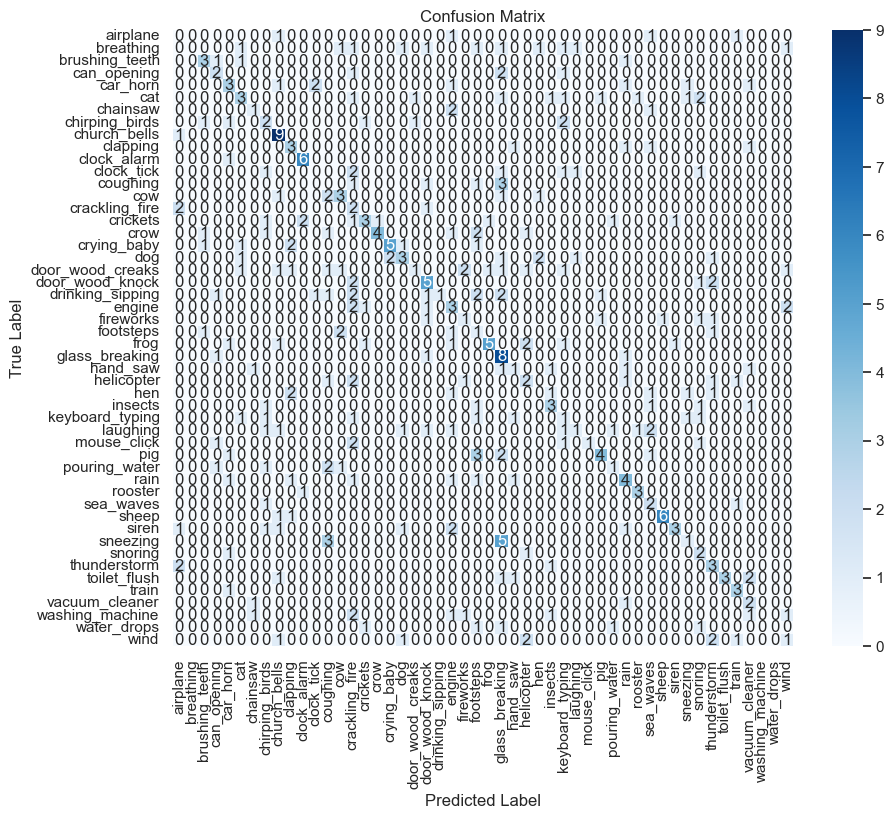

In [225]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [234]:
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

        airplane       0.00      0.00      0.00         4
       breathing       0.00      0.00      0.00        11
  brushing_teeth       0.43      0.50      0.46         6
     can_opening       0.29      0.33      0.31         6
        car_horn       0.30      0.30      0.30        10
             cat       0.33      0.23      0.27        13
        chainsaw       0.25      0.25      0.25         4
  chirping_birds       0.18      0.25      0.21         8
    church_bells       0.47      0.90      0.62        10
        clapping       0.30      0.43      0.35         7
     clock_alarm       0.67      0.86      0.75         7
      clock_tick       0.00      0.00      0.00         7
        coughing       0.00      0.00      0.00         6
             cow       0.38      0.38      0.38         8
  crackling_fire       0.09      0.40      0.14         5
        crickets       0.43      0.27      0.33        11
            c

C:\Users\KUSHAGRA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KUSHAGRA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KUSHAGRA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [235]:
import pandas as pd

# Calculate correct predictions for each category
correct_predictions = (y_pred == y_test)

# Create a DataFrame to store category-wise correct predictions count
category_counts = pd.DataFrame({'Category': y_test[correct_predictions].value_counts().index,
                                'Correct_Predictions': y_test[correct_predictions].value_counts().values})

# Sort DataFrame by correct predictions count in descending order
category_counts = category_counts.sort_values(by='Correct_Predictions', ascending=False)

# Take top 10 categories
top_10_categories = category_counts.head(10)

print(top_10_categories)


          Category  Correct_Predictions
0     church_bells                    9
1   glass_breaking                    8
2      clock_alarm                    6
3            sheep                    6
4             frog                    5
5  door_wood_knock                    5
6      crying_baby                    5
9             crow                    4
8              pig                    4
7             rain                    4


In [236]:
# Extract the top 10 categories
top_10_categories_list = top_10_categories['Category'].tolist()

# Filter the test set to include only samples belonging to the top 10 categories
X_test_top_10 = X_test[y_test.isin(top_10_categories_list)]
y_test_top_10 = y_test[y_test.isin(top_10_categories_list)]

# Predict labels for the filtered test set
y_pred_top_10 = nb_classifier.predict(X_test_top_10)

# Calculate accuracy for the top 10 categories
accuracy_top_10 = accuracy_score(y_test_top_10, y_pred_top_10)
print("Accuracy (Top 10 Categories):", accuracy_top_10)


Accuracy (Top 10 Categories): 0.5490196078431373


# RANDOM FOREST + ENSEMBLE METHODS

In [237]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier



# Initialize Random Forest classifier with the best parameters
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=810)

# Train Random Forest classifier with the best parameters
rf_classifier.fit(X_train, y_train)

# Predict labels for test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.4975


In [238]:
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

        airplane       0.22      0.50      0.31         4
       breathing       0.67      0.18      0.29        11
  brushing_teeth       0.62      0.83      0.71         6
     can_opening       0.25      0.33      0.29         6
        car_horn       0.38      0.30      0.33        10
             cat       0.78      0.54      0.64        13
        chainsaw       0.17      0.25      0.20         4
  chirping_birds       0.55      0.75      0.63         8
    church_bells       0.38      0.50      0.43        10
        clapping       0.50      0.71      0.59         7
     clock_alarm       0.71      0.71      0.71         7
      clock_tick       0.00      0.00      0.00         7
        coughing       0.20      0.33      0.25         6
             cow       0.50      0.50      0.50         8
  crackling_fire       0.38      1.00      0.56         5
        crickets       0.67      0.36      0.47        11
            c

In [242]:
import pandas as pd

# Calculate correct predictions for each category
correct_predictions = (y_pred == y_test)

# Create a DataFrame to store category-wise correct predictions count
category_counts = pd.DataFrame({'Category': y_test[correct_predictions].value_counts().index,
                                'Correct_Predictions': y_test[correct_predictions].value_counts().values})

# Sort DataFrame by correct predictions count in descending order
category_counts = category_counts.sort_values(by='Correct_Predictions', ascending=False)

# Take top 10 categories
top_10_categories = category_counts.head(10)

print(top_10_categories)


         Category  Correct_Predictions
0            frog                    9
3     crying_baby                    8
1            crow                    8
2  glass_breaking                    8
5             cat                    7
6             dog                    7
4            rain                    7
7           sheep                    6
8         insects                    6
9            wind                    6


In [243]:

# Filter the test set to include only samples belonging to the top 10 categories
X_test_top_10 = X_test[y_test.isin(top_10_categories_list)]
y_test_top_10 = y_test[y_test.isin(top_10_categories_list)]

# Predict labels for the filtered test set
y_pred_top_10 = rf_classifier.predict(X_test_top_10)

# Calculate accuracy for the top 10 categories
accuracy_top_10 = accuracy_score(y_test_top_10, y_pred_top_10)
print("Accuracy (Top 10 Categories):", accuracy_top_10)


Accuracy (Top 10 Categories): 0.6923076923076923


# XGBOOST

In [244]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the class labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize XGBoost classifie
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',n_estimators=100, num_class=len(label_encoder.classes_), random_state=42)

# Train XGBoost classifier
xgb_classifier.fit(X_train, y_train_encoded)

# Predict labels for test set
y_pred_encoded = xgb_classifier.predict(X_test)

# Decode predicted labels back to original class labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3875


In [245]:
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

        airplane       0.14      0.25      0.18         4
       breathing       0.43      0.27      0.33        11
  brushing_teeth       0.45      0.83      0.59         6
     can_opening       0.33      0.17      0.22         6
        car_horn       0.09      0.10      0.10        10
             cat       0.38      0.38      0.38        13
        chainsaw       0.25      0.25      0.25         4
  chirping_birds       0.33      0.38      0.35         8
    church_bells       0.31      0.40      0.35        10
        clapping       0.42      0.71      0.53         7
     clock_alarm       0.62      0.71      0.67         7
      clock_tick       0.00      0.00      0.00         7
        coughing       0.50      0.17      0.25         6
             cow       0.14      0.12      0.13         8
  crackling_fire       0.27      0.60      0.38         5
        crickets       0.50      0.18      0.27        11
            c

In [246]:
import pandas as pd

# Calculate correct predictions for each category
correct_predictions = (y_pred == y_test)

# Create a DataFrame to store category-wise correct predictions count
category_counts = pd.DataFrame({'Category': y_test[correct_predictions].value_counts().index,
                                'Correct_Predictions': y_test[correct_predictions].value_counts().values})

# Sort DataFrame by correct predictions count in descending order
category_counts = category_counts.sort_values(by='Correct_Predictions', ascending=False)

# Take top 10 categories
top_10_categories = category_counts.head(10)

print(top_10_categories)


          Category  Correct_Predictions
0             crow                    8
2            sheep                    7
3   glass_breaking                    7
4              dog                    7
1             frog                    7
5          insects                    6
6      crying_baby                    6
9             rain                    5
11     clock_alarm                    5
10        clapping                    5


# ENSEMBLE METHODS

In [273]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize SVM classifier with best parameters
svm_classifier = SVC(C=100, degree=2, gamma='auto', kernel='rbf')

# Initialize Random Forest classifier with 810 trees
rf_classifier = RandomForestClassifier(n_estimators=1000,random_state=42)

# Create a voting classifier with SVM and Random Forest
voting_classifier = VotingClassifier(estimators=[('svm', svm_classifier), ('random_forest', rf_classifier)])

# Train the voting classifier
voting_classifier.fit(X_train, y_train)

# Predict labels for test set
y_pred = voting_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.47


In [274]:

# Calculate correct predictions for each category
correct_predictions = (y_pred == y_test)

# Create a DataFrame to store category-wise correct predictions count
category_counts = pd.DataFrame({'Category': y_test[correct_predictions].value_counts().index,
                                'Correct_Predictions': y_test[correct_predictions].value_counts().values})

# Sort DataFrame by correct predictions count in descending order
category_counts = category_counts.sort_values(by='Correct_Predictions', ascending=False)

# Take top 10 categories
top_10_categories = category_counts.head(10)

print(top_10_categories)


         Category  Correct_Predictions
0       sea_waves                    9
1             cat                    8
2    thunderstorm                    7
3     can_opening                    7
4            frog                    6
5  crackling_fire                    6
6           sheep                    6
7        clapping                    6
8        crickets                    6
9             cow                    6


In [275]:
# Extract the top 10 categories
# Filter the test set to include only samples belonging to the top 10 categories

top_10_categories_list = top_10_categories['Category'].tolist()

X_test_top_10 = X_test[y_test.isin(top_10_categories_list)]
y_test_top_10 = y_test[y_test.isin(top_10_categories_list)]

# Predict labels for the filtered test set
y_pred_top_10 = voting_classifier.predict(X_test_top_10)

# Calculate accuracy for the top 10 categories
accuracy_top_10 = accuracy_score(y_test_top_10, y_pred_top_10)
print("Accuracy (Top 10 Categories):", accuracy_top_10)


Accuracy (Top 10 Categories): 0.6767676767676768
